In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/health_monitoring.csv')

In [ ]:
data.head()

,Device-ID/User-ID,Timestamp,Heart Rate,Heart Rate Below/Above Threshold (Yes/No),Blood Pressure,Blood Pressure Below/Above Threshold (Yes/No),Glucose Levels,Glucose Levels Below/Above Threshold (Yes/No),Oxygen Saturation (SpO₂%),SpO₂ Below Threshold (Yes/No),Alert Triggered (Yes/No),Caregiver Notified (Yes/No)
0,D1000,1/22/2025 20:42,116,Yes,136/79 mmHg,Yes,141,Yes,98,No,Yes,Yes
1,D1001,1/16/2025 12:22,119,Yes,105/77 mmHg,No,146,Yes,93,No,Yes,Yes
2,D1002,01-10-2025 09:26,97,No,120/87 mmHg,Yes,133,No,97,No,Yes,Yes
3,D1003,01-10-2025 09:53,113,Yes,138/65 mmHg,Yes,82,No,98,No,Yes,Yes
4,D1004,01-03-2025 15:50,88,No,108/69 mmHg,No,146,Yes,97,No,Yes,Yes


In [ ]:
data.shape

(10000, 12)

In [ ]:
#keeping only the relevant columns..
data = data.iloc[:, 2:11]

In [ ]:
data

,Heart Rate,Heart Rate Below/Above Threshold (Yes/No),Blood Pressure,Blood Pressure Below/Above Threshold (Yes/No),Glucose Levels,Glucose Levels Below/Above Threshold (Yes/No),Oxygen Saturation (SpO₂%),SpO₂ Below Threshold (Yes/No),Alert Triggered (Yes/No)
0,116,Yes,136/79 mmHg,Yes,141,Yes,98,No,Yes
1,119,Yes,105/77 mmHg,No,146,Yes,93,No,Yes
2,97,No,120/87 mmHg,Yes,133,No,97,No,Yes
3,113,Yes,138/65 mmHg,Yes,82,No,98,No,Yes
4,88,No,108/69 mmHg,No,146,Yes,97,No,Yes
...,...,...,...,...,...,...,...,...,...
9995,116,Yes,137/64 mmHg,Yes,104,No,95,No,Yes
9996,75,No,115/65 mmHg,No,112,No,94,No,No
9997,112,Yes,123/69 mmHg,No,142,Yes,93,No,Yes
9998,101,Yes,114/77 mmHg,No,110,No,91,Yes,Yes


In [ ]:
#Rename the column..
data = data.rename(columns={"Heart Rate": "HR","Heart Rate Below/Above Threshold (Yes/No)":"HR_Status",
                            "Blood Pressure":"BP","Blood Pressure Below/Above Threshold (Yes/No)":"BP_Status",
                            "Oxygen Saturation (SpO₂%)":"OS","SpO₂ Below Threshold (Yes/No)":"OS_Status",
                            "Glucose Levels":"GL","Glucose Levels Below/Above Threshold (Yes/No)":"GL_Status",
                            "Alert Triggered (Yes/No)":"Alert"})


In [ ]:
data

,HR,HR_Status,BP,BP_Status,GL,GL_Status,OS,OS_Status,Alert
2,97,No,120/87 mmHg,Yes,133,No,97,No,Yes
3,113,Yes,138/65 mmHg,Yes,82,No,98,No,Yes
4,88,No,108/69 mmHg,No,146,Yes,97,No,Yes
5,119,Yes,114/65 mmHg,No,133,No,91,Yes,Yes
6,109,Yes,137/61 mmHg,Yes,143,Yes,98,No,Yes
7,114,Yes,119/61 mmHg,No,107,No,99,No,Yes
8,101,Yes,117/61 mmHg,No,134,No,97,No,Yes
9,88,No,101/76 mmHg,No,133,No,94,No,No


In [ ]:
#split the blood pressure into systolic and diastolic pressure..
data["BP"] = data["BP"].str.replace(" mmHg", "", regex=False)

data[["Systolic", "Diastolic"]] = data["BP"].str.split("/", expand=True).astype(float)

#Drop the BP column
data.drop(columns=["BP"], inplace=True)

In [ ]:
ordered_columns = [
    "HR",             # Heart Rate
    "Systolic",       # from BP
    "Diastolic",      # from BP
    "GL",             # Glucose
    "OS",             # Oxygen Saturation
    "HR_Status",      # Heart Rate Threshold flag
    "BP_Status",      # BP Threshold flag
    "GL_Status",      # Glucose Threshold flag
    "OS_Status",      # Oxygen Threshold flag
    "Alert"           # Final alert flag
]

# Apply the column order
data = data[ordered_columns]

In [ ]:
data

,HR,Systolic,Diastolic,GL,OS,HR_Status,BP_Status,GL_Status,OS_Status,Alert
0,116,136.0,79.0,141,98,Yes,Yes,Yes,No,Yes
1,119,105.0,77.0,146,93,Yes,No,Yes,No,Yes
2,97,120.0,87.0,133,97,No,Yes,No,No,Yes
3,113,138.0,65.0,82,98,Yes,Yes,No,No,Yes
4,88,108.0,69.0,146,97,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...
9995,116,137.0,64.0,104,95,Yes,Yes,No,No,Yes
9996,75,115.0,65.0,112,94,No,No,No,No,No
9997,112,123.0,69.0,142,93,Yes,No,Yes,No,Yes
9998,101,114.0,77.0,110,91,Yes,No,No,Yes,Yes


In [ ]:
data.shape

(10000, 10)

In [ ]:
print(data.corr()["Alert"])

HR           0.340976
Systolic     0.240155
Diastolic    0.166153
GL           0.004249
OS          -0.176639
HR_Status    0.417385
BP_Status    0.451103
GL_Status    0.351419
OS_Status    0.277437
Alert        1.000000
Name: Alert, dtype: float64


**Label Encoding the required columns**

In [ ]:
binary_cols = ["HR_Status", "BP_Status", "GL_Status", "OS_Status", "Alert"]

In [ ]:
le = LabelEncoder()

In [ ]:
#Yes is marked as 1 and No as 0
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
data

,HR,Systolic,Diastolic,GL,OS,HR_Status,BP_Status,GL_Status,OS_Status,Alert
0,116,136.0,79.0,141,98,1,1,1,0,1
1,119,105.0,77.0,146,93,1,0,1,0,1
2,97,120.0,87.0,133,97,0,1,0,0,1
3,113,138.0,65.0,82,98,1,1,0,0,1
4,88,108.0,69.0,146,97,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,116,137.0,64.0,104,95,1,1,0,0,1
9996,75,115.0,65.0,112,94,0,0,0,0,0
9997,112,123.0,69.0,142,93,1,0,1,0,1
9998,101,114.0,77.0,110,91,1,0,0,1,1


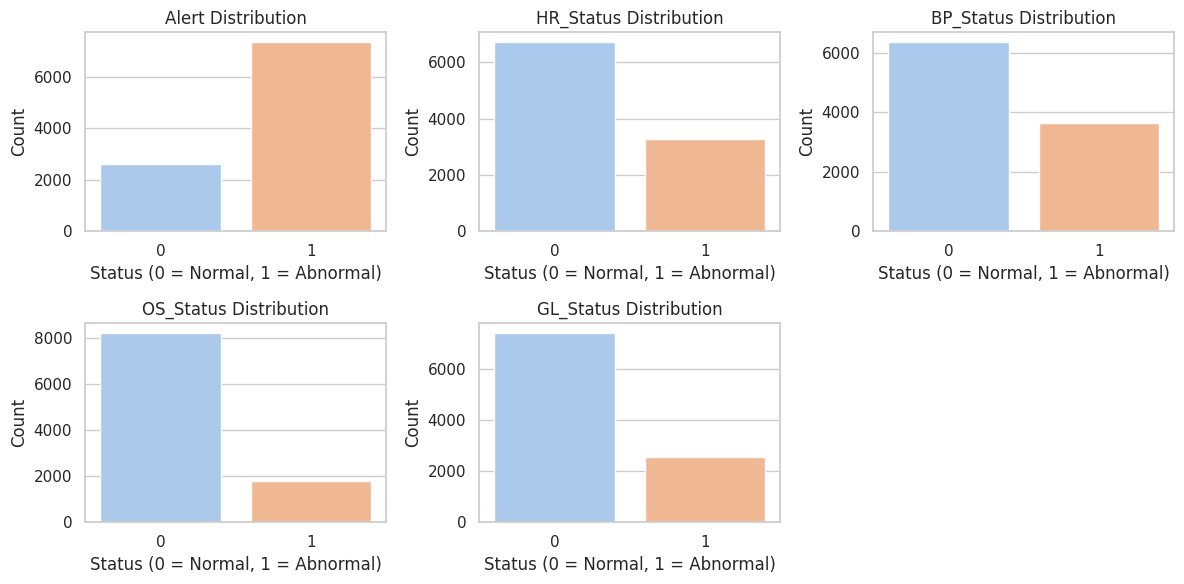

In [ ]:

# List of status columns to visualize
status_columns = ['Alert', 'HR_Status', 'BP_Status', 'OS_Status', 'GL_Status']
# Plotting
plt.figure(figsize=(12, 6))
for idx, col in enumerate(status_columns):
    plt.subplot(2, 3, idx+1)
    sns.countplot(data=data, x=col, palette='pastel')
    plt.title(f'{col} Distribution')
    plt.xlabel('Status (0 = Normal, 1 = Abnormal)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Trying Different classification models for predicition..**

**Using KNN,SVM, Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=8000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
}

# Store performance results
results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    print(f"\n🔍 {name} Classification Report:\n")
    print(classification_report(y_test, y_pred))



🔍 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.43      0.52       527
           1       0.82      0.92      0.87      1473

    accuracy                           0.79      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.77      0.79      0.77      2000


🔍 SVM Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       527
           1       0.92      0.96      0.94      1473

    accuracy                           0.91      2000
   macro avg       0.90      0.86      0.88      2000
weighted avg       0.91      0.91      0.91      2000


🔍 KNN Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       527
           1       0.95      0.94      0.94      1473

    accuracy                           0.92      2000
   macro avg       

**Visualizing the evaulation metrics of different models.**

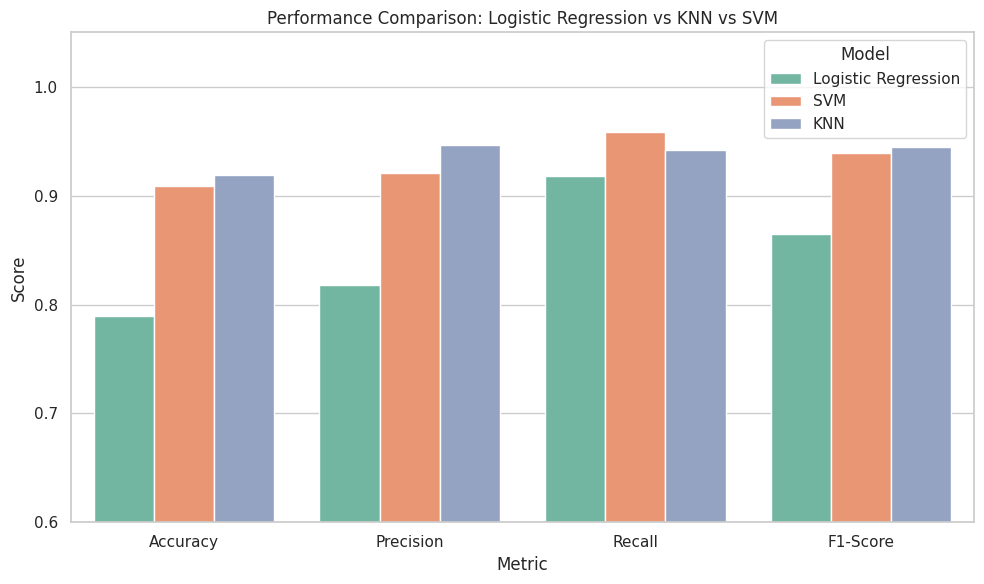

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Set style
sns.set(style="whitegrid")

# Melt the dataframe for Seaborn
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette="Set2")

plt.title("Performance Comparison: Logistic Regression vs KNN vs SVM")
plt.ylim(0.6, 1.05)
plt.ylabel("Score")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


**Predicitions are being made by setting the flags for each parameter depending on the thresholds.**

In [ ]:
thresholds = {
    'HR': (60, 100),
    'Systolic': (90, 120),
    'Diastolic': (60, 80),
    'OS': (95, 100),
    'GL': (70, 140)
}

In [ ]:
def status_from_value(val, low, high):
    if val < low or val>high:
        return 1
    return 0

In [ ]:
# Get user input
hr = int(input("Enter Heart Rate: "))
systolic = int(input("Enter Systolic BP: "))
diastolic = int(input("Enter Diastolic BP: "))
os = int(input("Enter SpO2: "))
gl = int(input("Enter Glucose Level: "))

# Calculate status flags
hr_status = status_from_value(hr, *thresholds['HR'])
sys_status = status_from_value(systolic, *thresholds['Systolic'])
dia_status = status_from_value(diastolic, *thresholds['Diastolic'])
os_status = status_from_value(os, *thresholds['OS'])
gl_status = status_from_value(gl, *thresholds['GL'])

# Optional: display status flags
print("\nStatus Flags (1 = Abnormal):")
print(f"Heart Rate Flag: {hr_status}")
print(f"Systolic BP Flag: {sys_status}")
print(f"Diastolic BP Flag: {dia_status}")
print(f"SpO2 Flag: {os_status}")
print(f"Glucose Flag: {gl_status}")

# Prepare input for model
# Assuming the model is trained on these raw values (not flags)
user_data = np.array([[hr, systolic, diastolic, os, gl]])
# Predict using trained classifiers
# --- Predict using trained classifiers ---
print("\n🔍 Model Predictions:")
votes = []

for name, model in classifiers.items():
    pred = model.predict(user_data)
    votes.append(int(pred[0]))
    result = "⚠️ ALERT" if pred[0] == 1 else "✅ SAFE"
    print(f"{name}: {result}")

# --- Majority Voting ---
final_vote = Counter(votes).most_common(1)[0][0]
print("\n🗳️ Voting Outcome:", votes)

if final_vote == 1:
    print("🔴 Final Decision (Majority Vote): ALERT ⚠️")
else:
    print("🟢 Final Decision (Majority Vote): SAFE ✅")

Enter Heart Rate: 115
Enter Systolic BP: 89
Enter Diastolic BP: 75
Enter SpO2: 100
Enter Glucose Level: 120

Status Flags (1 = Abnormal):
Heart Rate Flag: 1
Systolic BP Flag: 1
Diastolic BP Flag: 0
SpO2 Flag: 0
Glucose Flag: 0

🔍 Model Predictions:
Logistic Regression: ✅ SAFE
SVM: ⚠️ ALERT
KNN: ⚠️ ALERT

🗳️ Voting Outcome: [0, 1, 1]
🔴 Final Decision (Majority Vote): ALERT ⚠️


In [ ]:
import pickle

# Save each classifier
for name, model in classifiers.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Saved: {filename}")

✅ Saved: logistic_regression_model.pkl
✅ Saved: svm_model.pkl
✅ Saved: knn_model.pkl
